<a href="https://colab.research.google.com/github/Baohikari/MNIST_Digit_Classification_using_MLP/blob/main/MNIST_Digit_Classification_using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["image.cmap"] = "gray"

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
SEED_VALUE = 42

#Fix seed to make training deterministic
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# 1. Load and Split the MNIST Dataset

In [ ]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]

y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


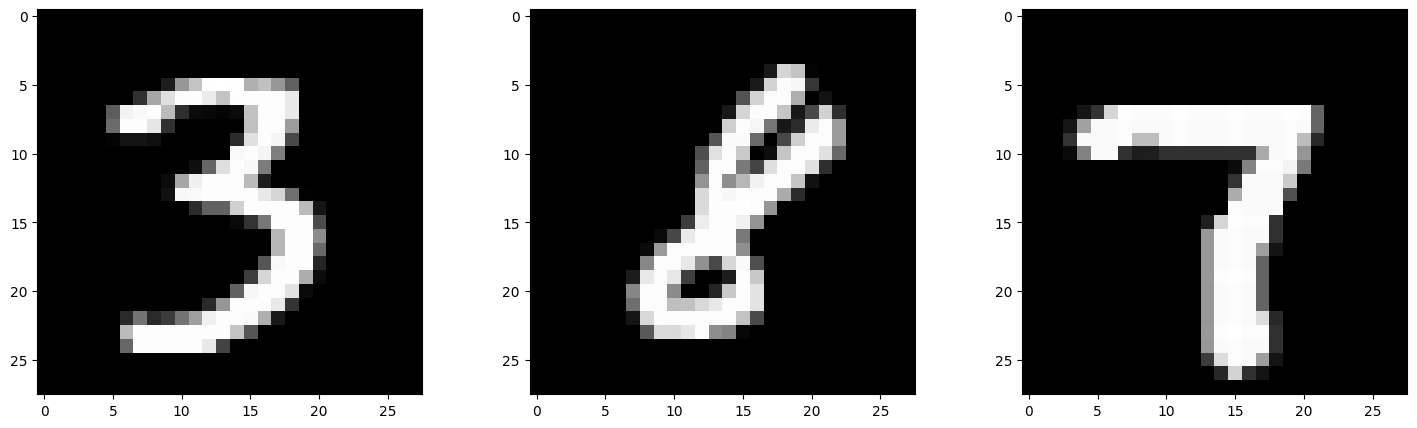

In [ ]:
plt.figure(figsize=(18, 5))
for i in range(3):
  plt.subplot(1, 3, i + 1)
  plt.axis(True)
  plt.imshow(X_train[i], cmap="gray")
  plt.subplots_adjust(wspace=0.2, hspace=0.2)

# 2. Dataset Preprocessing

# 2.1. Input feature transformation and normalization

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype('float32') / 255

X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype('float32') / 255

# 2.2. Label Encoding Options

# 2.2.1 Integer Label Encoding

In [ ]:
# Load the Fashion MNIST dataset
((X_train_fashion, y_train_fashion), (_, _)) = fashion_mnist.load_data()

# The labels in the Fashion MNIST dataset are encoded as integers
print(y_train_fashion[0:9])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[9 0 0 3 0 2 7 2 5]


# 2.2.2. One-Hot Label Encoding

In [ ]:
y_train_onehot = to_categorical(y_train_fashion[0:9])
print(y_train_onehot)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


# 3. Model Architecture

# 3.1. Deep Neural Network Architecture

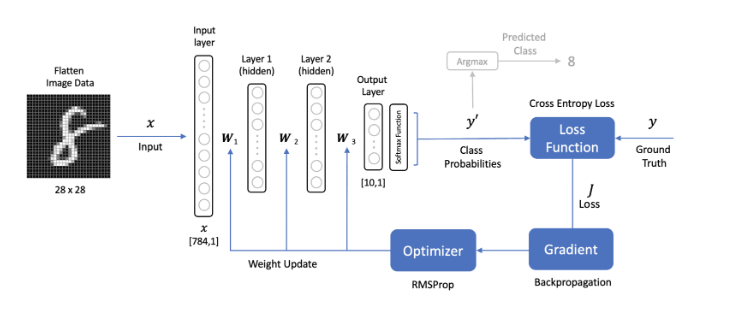

# 4. Model Implementation

# 4.1. Define the Model

In [ ]:
# Instantiate the model
model = tf.keras.Sequential()

# Build the model
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# 4.2. Compile the Model

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4.3. Train Model

In [ ]:
training_results = model.fit(X_train,
                             y_train,
                             epochs = 21,
                             batch_size = 64,
                             validation_data = (X_valid, y_valid))

Epoch 1/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8643 - loss: 0.4780 - val_accuracy: 0.0863 - val_loss: 2.3052
Epoch 2/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9601 - loss: 0.1360 - val_accuracy: 0.0863 - val_loss: 2.3224
Epoch 3/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9746 - loss: 0.0894 - val_accuracy: 0.0863 - val_loss: 2.3442
Epoch 4/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9818 - loss: 0.0651 - val_accuracy: 0.0863 - val_loss: 2.3705
Epoch 5/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9866 - loss: 0.0491 - val_accuracy: 0.0863 - val_loss: 2.3927
Epoch 6/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9899 - loss: 0.0377 - val_accuracy: 0.0863 - val_loss: 2.4378
Epoch 7/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9927 - loss: 0.0293 - val_accuracy: 0.0863 - val_loss: 2.4671
Epoch 8/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9937 - loss: 0.0232 - val_accuracy: 0.

# 4.4. Plot the Training Results

In [ ]:
def plot_results(metrics, ylabel="", ylim=None, metric_name=None, color=None):
    plt.figure(figsize=(18, 5))
    epochs = range(len(metrics[0]))

    for i, metric in enumerate(metrics):
        plt.plot(epochs, metric, color[i], label=metric_name[i])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    if ylim:
        plt.ylim(ylim)
    plt.legend()
    plt.grid(True)
    plt.show()

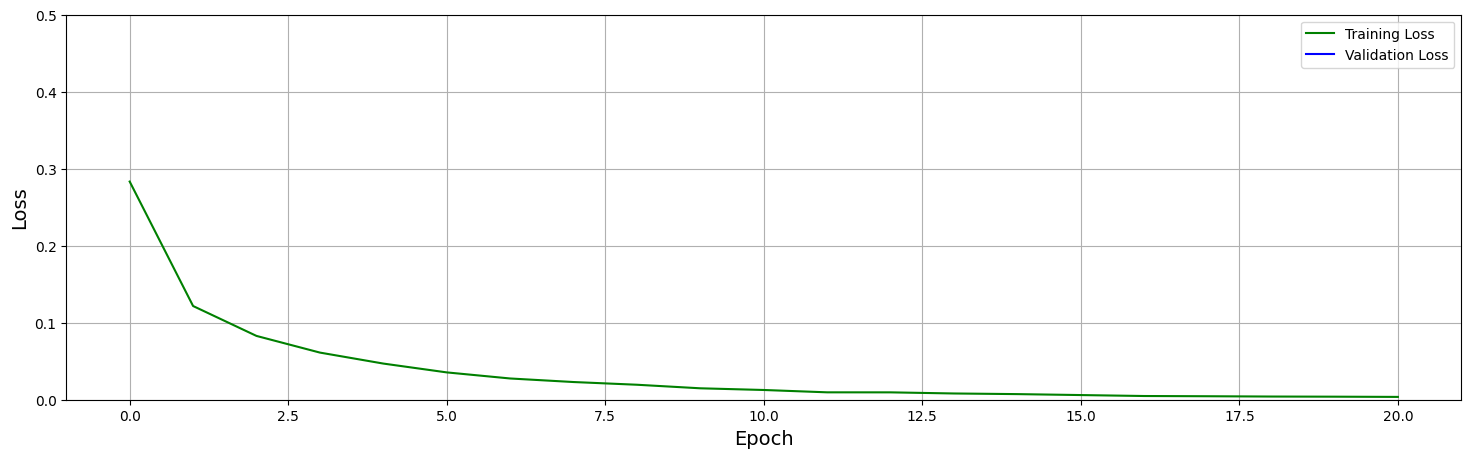

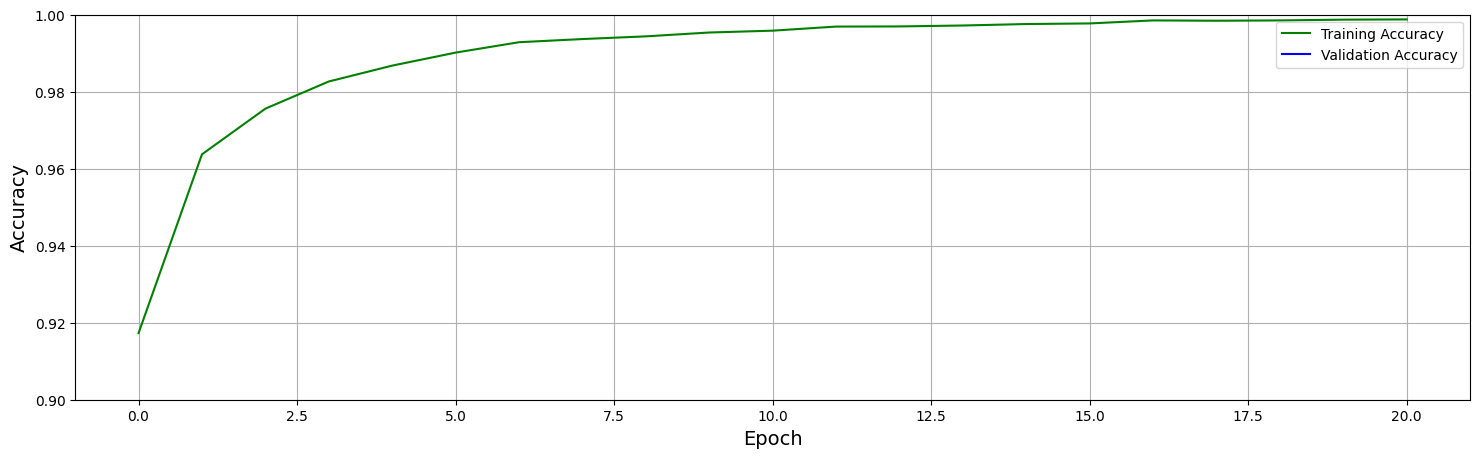

In [ ]:
# Retrieve training results
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

# Plot Loss
plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 0.5],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

# Plot Accuracy
plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.9, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

# 5. Model Evaluation

# 5.1. Make Predictions on Sample Test Images

In [ ]:
predictions = model.predict(X_test)
index = 0  # up to 9999
print("Ground truth for test digit: ", y_test[index])
print("\n")
print("Predictions for each class:\n")
for i in range(10):
    print("digit:", i, " probability: ", predictions[index][i])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Ground truth for test digit:  7


Predictions for each class:

digit: 0  probability:  9.023735e-25
digit: 1  probability:  2.3076376e-21
digit: 2  probability:  6.1876e-16
digit: 3  probability:  2.060251e-15
digit: 4  probability:  6.840607e-26
digit: 5  probability:  3.807431e-25
digit: 6  probability:  1.2105567e-33
digit: 7  probability:  0.99999994
digit: 8  probability:  1.3338257e-23
digit: 9  probability:  1.4317126e-15


# 5.2. Confusion Matrix

In [ ]:
# Generate predictions for the test dataset.
predictions = model.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


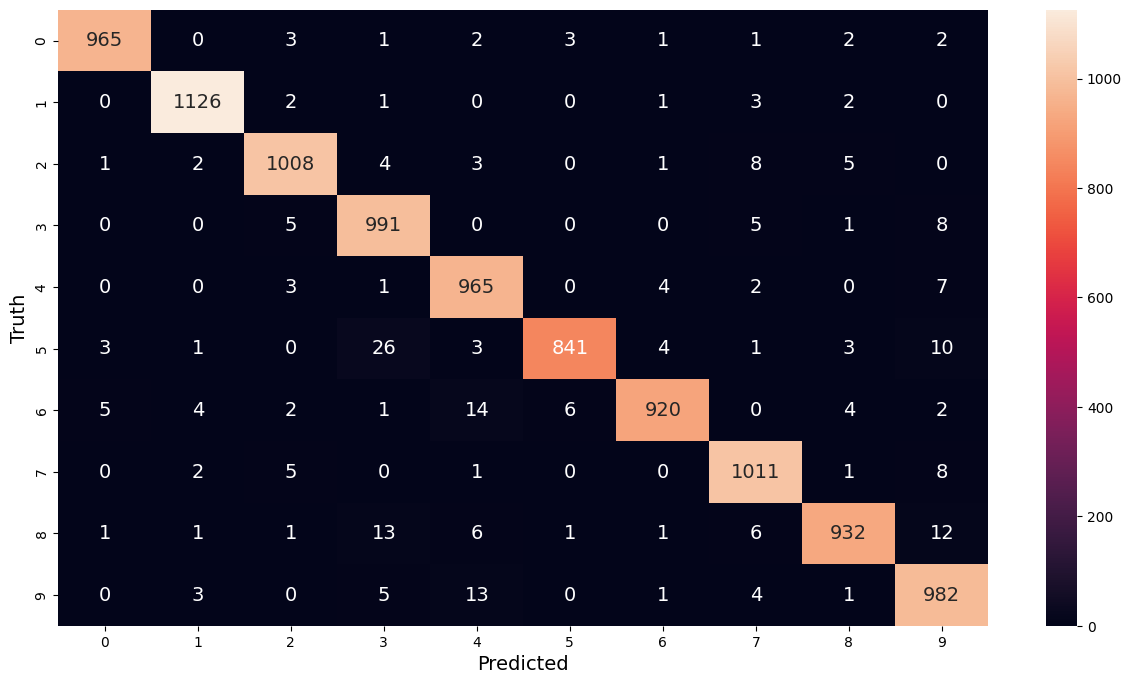

In [ ]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = y_test

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[15, 8])
import seaborn as sn

sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()